#### Import the Modules and Set Up Your Paths

In [42]:
# import the numpy, matplotlib, netcdf4 and os modules
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

In [43]:
# set a path to where your homework 7 data files will live
# you will want to store data on an external drive because
# it will take up a lot of room
sst_local_folder = 'C:\\Users\\seamu\\ms274\\week6_sst\\ms274_hw6\\AVHRR'

# define a location in the NINO3.4 region
# this region is used as an indicator for ENSO events
#site_longitude = -140
#site_latitude = 0

- MUR25-JPL-L4-GLOB-v04.2

#### Make a list of SST data files

In [44]:
# create an empty list to store the files
sst_nc_files = []

# write a for loop to loop through the files
for sst_file_name in os.listdir(sst_local_folder):
    

    # if the file is an nc file from SMAP
    if sst_file_name[-2:] == 'nc':
        sst_nc_files.append(sst_file_name)
        #print(sst_file_name)
# sort the file list
sst_nc_files.sort()
#print(sst_nc_files)
#sst_nc_files = sst_nc_files[:10]
# print the number of files that are found
print(len(sst_nc_files))

1063


#### Make a function to read SST files

In [45]:
# define the read_SST_from_file function hereprint()
def read_SST_from_file(sst_file_path):

    dsst = nc4.Dataset(sst_file_path)
    
    sst_longitude = np.array(dsst.variables['lon'])
    # print(sst_longitude)
    sst_latitude = np.array(dsst.variables['lat'])
    analysed_sst_3d = np.array(dsst.variables['analysed_sst'])
    analysed_sst = analysed_sst_3d.reshape(720,1440)
        
    dsst.close()

    #analysed_sst = analysed_sst_3d[0,:,:] # Converting 3D array to a 2D array

    min_x_enso = -170
    min_y_enso = -5
    max_x_enso = -120
    max_y_enso = 5

    min_x_index_enso = np.argmin(np.abs(min_x_enso - sst_longitude))
    min_y_index_enso = np.argmin(np.abs(min_y_enso - sst_latitude))

    max_x_index_enso = np.argmin(np.abs(max_x_enso - sst_longitude))
    max_y_index_enso = np.argmin(np.abs(max_y_enso - sst_latitude))

    # print('x_indices', min_x_index_enso, max_x_index_enso)
    # print('y_indices', min_y_index_enso, max_y_index_enso)

    # sst_enso_longitude = -140
    # sst_enso_latitude = 0
    # sst_long_index = np.argmin(np.abs(sst_longitude-sst_enso_longitude))
    # sst_lat_index = np.argmin(np.abs(sst_latitude-sst_enso_latitude))
    # enso_sst = analysed_sst[sst_lat_index, sst_long_index]

    enso_grid_subset = analysed_sst[min_y_index_enso:max_y_index_enso,min_x_index_enso:max_x_index_enso]
    #print(enso_grid_subset)
    enso_filtered = enso_grid_subset[enso_grid_subset >-10000]
    enso_sst_average = np.nanmean(enso_filtered)
    #if enso_filtered.size == 0:
        #enso_sst_average = np.nan #or any other value to indicate missing data
    #else:
        #enso_sst_average = np.nanmean(enso_filtered) 
    return(enso_sst_average)
    
    # print the indices to be sure these are ordered correctly
    
    #print(np.shape(enso_grid_subset))

#### Make an array of dates for the SST timeseries

In [46]:
# make an empty list for strings storing the date
sst_date_list = []

# loop through the file name
for sst_file_name in sst_nc_files:
    #print(sst_file_name)
    # split the file name and retrieve the year and month strings
    sst_year = sst_file_name.split('_')[0][0:4]
    sst_month = sst_file_name.split('_')[0][4:6]
    sst_day = sst_file_name.split('_')[0][6:8]

    # join the year, month, and day strings with dashes
    # and add the date string to the date_list
    sst_date_string = sst_year+'-'+ sst_month+'-'+ sst_day
    sst_date_list.append(sst_date_string)
        
#print(sst_date_list)
# convert the date list to array with the keyword dtype='datetime64'
sst_date_array = np.array(sst_date_list, dtype ='datetime64')
#print(sst_date_array)
print(len(sst_date_array))
print(np.shape(sst_date_array))

1063
(1063,)


In [47]:
#sss_values_array = np.array(sss_values)
#print(sss_values_array)
#print(len(sss_values_array))
#sss_values_array(!= -9999)
#sss_values_filtered = np.delete(sss_values_array, np.where(sss_values_array ==-9999.0))
#print(sss_values_filtered)
#print(len(sss_values_filtered))

#### Make a list of SST values

In [48]:
# make an empty list for the sss values
sst_values = []

# loop through the file names
for sst_file_name in sst_nc_files:
    
    # define a file path
    sst_file_path = sst_local_folder + '\\' + sst_file_name

    # use the sss function to find the sss value for this file
    sst = read_SST_from_file(sst_file_path)

    # add the sss value to the list
    sst_values.append(sst)

kelvin = 273.15
sst_values_array = np.array(sst_values)
sst_values_celcius = sst_values_array - kelvin
print(sst_values_celcius)
#print(len(sst_values_celcius))
print(np.shape(sst_values_celcius))


[27.865509 27.891785 27.87976  ... 28.882751 28.837341 28.833954]
(1063,)


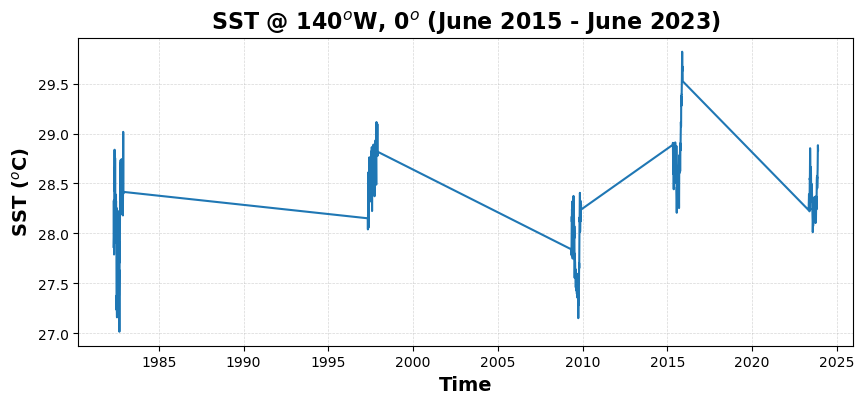

In [49]:
# make a figure of width 10 and height 4
fig = plt.figure(figsize=(10,4))
# plot the timeseries
plt.plot(sst_date_array, sst_values_celcius)

# label the y axis with the units
plt.title('SST @ 140$^{o}$W, 0$^{o}$ (June 2015 - June 2023)', fontsize='16', weight = 'bold')
plt.gca().set_ylabel('SST ($^{o}$C)', fontsize='14', weight = 'bold')
plt.gca().set_xlabel('Time', fontsize='14', weight = 'bold')

# add grid lines
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)


In [50]:
sst_path = 'C:\\Users\\seamu\\ms274\\week6_sst\\ms274_hw6\\AVHRR\\19980610120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc'
dm = nc4.Dataset(sst_path)
print(dm.variables.keys())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\seamu\\ms274\\week6_sst\\ms274_hw6\\AVHRR\\19980610120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc'

In [188]:
print(dm.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: longitude
    standard_name: longitude
    axis: X
    units: degrees_east
    comment: Uniform grid with centers from -179.875 to 179.875 by 0.25 degrees.
    bounds: lon_bnds
    valid_max: 180.0
    valid_min: -180.0
unlimited dimensions: 
current shape = (1440,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [189]:
print(dm.variables['lat'])

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: latitude
    standard_name: latitude
    axis: Y
    units: degrees_north
    comment: Uniform grid with centers from -89.875 to 89.875 by 0.25 degrees.
    bounds: lat_bnds
    valid_max: 90.0
    valid_min: -90.0
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [92]:
print(dm.variables['analysed_sst'])

<class 'netCDF4._netCDF4.Variable'>
int16 analysed_sst(time, lat, lon)
    long_name: analysed sea surface temperature
    standard_name: sea_surface_temperature
    units: kelvin
    _FillValue: -32768
    add_offset: 273.15
    scale_factor: 0.01
    valid_min: -300
    valid_max: 4500
    comment: Single-sensor Pathfinder 5.0/5.1 AVHRR SSTs used until 2005; two AVHRRs at a time are used 2007 onward. Sea ice and in-situ data used also are 'near real time' quality for recent period.  SST (bulk) is at ambiguous depth because multiple types of observations are used.
    source: AVHRR_Pathfinder-NODC-L3C-v5.0,ICOADS_SHIP-NCAR-IN_SITU-v2.4,ICOADS_BUOY-NCAR-IN_SITU-v2.4,GSFC_25KM-NSIDC-ICE
unlimited dimensions: time
current shape = (1, 720, 1440)
filling on


In [93]:
analysed_sst_3d = np.array(dm.variables['analysed_sst'])
print(np.shape(analysed_sst_3d))
analysed_sst_2d = analysed_sst_3d.reshape(720,1440)
print(np.shape(analysed_sst_2d))

(1, 720, 1440)
(720, 1440)


In [94]:
print(dm.variables['analysis_error'])

<class 'netCDF4._netCDF4.Variable'>
int16 analysis_error(time, lat, lon)
    long_name: estimated error standard deviation of analysed_sst
    units: kelvin
    _FillValue: -32768
    add_offset: 0.0
    scale_factor: 0.01
    valid_min: 0
    valid_max: 32767
    comment: Sum of bias, sampling and random errors.
unlimited dimensions: time
current shape = (1, 720, 1440)
filling on


In [95]:
print(dm.variables['mask'])

<class 'netCDF4._netCDF4.Variable'>
int8 mask(time, lat, lon)
    long_name: sea/land field composite mask
    _FillValue: -128
    flag_meanings: water land
    comment: Binary mask distinguishing water and land only.
    flag_masks: [1 2]
    source: RWReynolds_landmask_V1.0
    valid_max: 2
    valid_min: 1
unlimited dimensions: time
current shape = (1, 720, 1440)
filling on


In [112]:
print(dm.variables['sea_ice_fraction'])

<class 'netCDF4._netCDF4.Variable'>
int8 sea_ice_fraction(time, lat, lon)
    long_name: sea ice area fraction
    _FillValue: -128
    add_offset: 0.0
    scale_factor: 0.01
    valid_min: 0
    valid_max: 100
    standard_name: sea_ice_area_fraction
    units: 1
    comment: 7-day median filtered .  Switch from 25 km NASA team ice (http://nsidc.org/data/nsidc-0051.html)  to 50 km NCEP ice (http://polar.ncep.noaa.gov/seaice) after 2004 results in artificial increase in ice coverage.
    source: GSFC_25KM-NSIDC-ICE
unlimited dimensions: time
current shape = (1, 720, 1440)
filling on


In [113]:
print(dm.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: reference time of sst field
    standard_name: time
    axis: T
    units: seconds since 1981-01-01 00:00:00
    bounds: time_bnds
    calendar: gregorian
    comment: Nominal time because observations are from different sources and are made at different times of the day.
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of -2147483647 used


In [114]:
print(dm.variables['lat_bnds'])

<class 'netCDF4._netCDF4.Variable'>
float32 lat_bnds(lat, nv)
    comment: This variable defines the latitude values at the north and south bounds of every 0.25-degree pixel.
unlimited dimensions: 
current shape = (720, 2)
filling on, default _FillValue of 9.969209968386869e+36 used


In [115]:
print(dm.variables['lon_bnds'])

<class 'netCDF4._netCDF4.Variable'>
float32 lon_bnds(lon, nv)
    comment: This variable defines the longitude values at the west and east bounds of every 0.25-degree pixel.
unlimited dimensions: 
current shape = (1440, 2)
filling on, default _FillValue of 9.969209968386869e+36 used


In [116]:
print(dm.variables['time_bnds'])

<class 'netCDF4._netCDF4.Variable'>
int32 time_bnds(time, nv)
    comment: This variable defines the start and end of the time span for the data.
unlimited dimensions: time
current shape = (1, 2)
filling on, default _FillValue of -2147483647 used


In [117]:
# store the longitude, latitude, and smap_sss as numpy arrays
longitude = np.array(dm.variables['lon'])
latitude = np.array(dm.variables['lat'])
analysed_sst = np.array(dm.variables['analysed_sst'])
# check the shapes of each numpy array
print(np.shape(longitude))
print(np.shape(latitude))
print(np.shape(analysed_sst))

(1440,)
(720,)
(1, 720, 1440)


<function matplotlib.pyplot.show(close=None, block=None)>

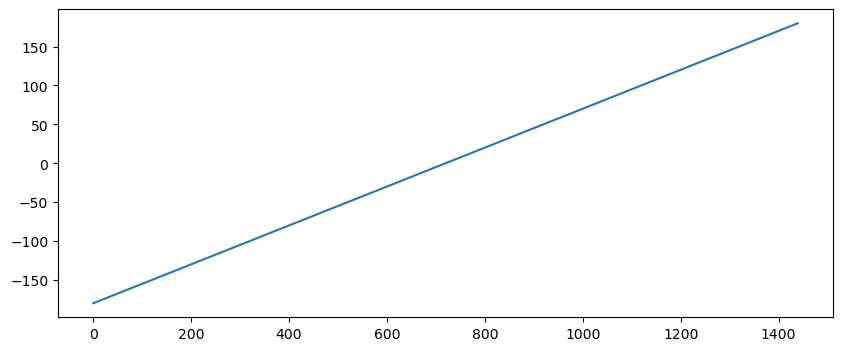

In [118]:
# make a new figure object with width 10 and height 4
fig = plt.figure(figsize=(10,4))

# plot the longitude variable
plt.plot(longitude)

# show the plot 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

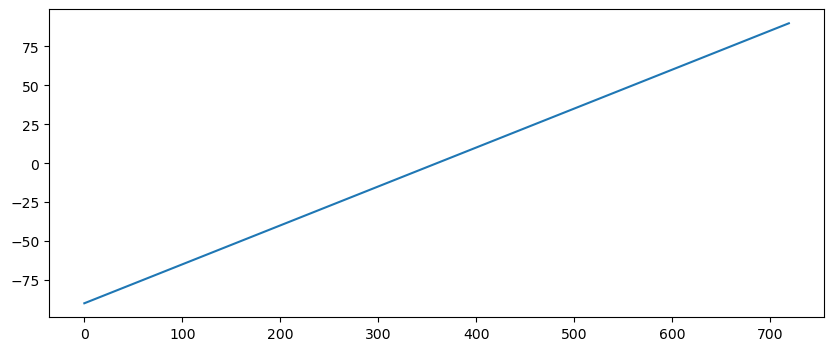

In [119]:
# make a new figure object with width 10 and height 4
fig = plt.figure(figsize=(10,4))

# plot the longitude variable
plt.plot(latitude)

# show the plot 
plt.show